In [1]:
import numpy as np
import pickle
from dataset import get_loaders
from itertools import combinations
import matplotlib.pyplot as plt


In [ ]:
with open('results/results.P', 'rb') as f:
    results = pickle.load(f)
results = results['Cortical']['analysis'] 
reg_results = results['reg_results']
cat_regs = reg_results['cat_regs']
con_regs = reg_results['con_regs']

In [ ]:
data = get_loaders(batch_size=32, meta=False,
                    use_images=True, image_dir='images/',
                    n_episodes=None)
train_data, train_loader, test_data, test_loader, analyze_data, analyze_loader = data
n_states = test_data.n_states 
# loc2idx = test_data.loc2idx 
# idx2loc = {idx:loc for loc, idx in loc2idx.items()}
idxs = [idx for idx in range(n_states)]


In [ ]:
run = -1
cp = -1

In [ ]:
y_hat_Es = con_regs['y_hat_Es'] # [runs, checkpoints, n_combinations]: [2, 11, 120]
ys = con_regs['ys'] 

wE = ys - y_hat_Es
wE = wE[run][cp]

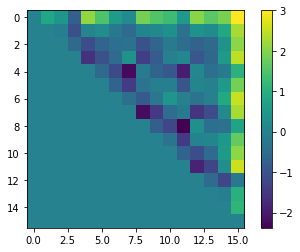

In [4]:
rsa_dist = np.zeros(shape=(n_states, n_states))
for i, (idx1, idx2) in enumerate(combinations(idxs, 2)):
    rsa_dist[idx1][idx2] = wE[i]

plt.imshow(rsa_dist)
plt.colorbar()